In [7]:
from PIL import Image, ImageDraw
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import pandas as pd
import cv2

%matplotlib inline

.rbox.scoreファイルには、各行が1つの境界ボックスに対応する複数の行が含まれている。各行には7つの数字が含まれる。

- 最初の2つの数字は、境界ボックスの中心点の位置
- 3-4は、境界ボックスの幅と高さ 
- DRBoxは1つのクラスの予測しか提供しないため、5番目はオブジェクトのラベル。これは最近1に固定されている。
- 6番目の数字は、このバウンディングボックスの角度（度）
- 7位がスコアです。検出されたオブジェクトはスコアでソートされる

In [13]:
def get_rect(center, w, h):
    w = int(w)
    h = int(h)
    x, y = center
    x1 = int(x - w / 2 )
    y1 = int(y - h / 2)
    
    return x1, y1, x1 + w, y1 + h


def draw_rectangle(draw, coordinates, color, width): 

    i = 0
    for i in range(width): 
        
        rect_start = (coordinates[0][0] - i, coordinates[0][1] - i) 
        rect_end = (coordinates[1][0] + i, coordinates[1][1] + i) 
        draw.rectangle((rect_start, rect_end), outline = color) 
        i+=1


def draw_rectangles(w, h, cx, cy, angle):

    # boundingbox用の画像を生成する
    buff = 100
    half_buff = buff/2

    overlay = Image.new('RGBA', (w + buff, h + buff))
    draw = ImageDraw.Draw(overlay)
    x1, y1, x2, y2 = get_rect((cx, cy), w, h)
       
    draw_rectangle(draw, ((half_buff, half_buff), (w+half_buff, h+half_buff)), color=(0, 255, 0), width=5)

    # 画像を回転させる
    rotated = overlay.rotate(angle)
    im.paste(rotated, (int(x1-half_buff), int(y1-half_buff)), rotated)

    # 回転前のboundingbox
    draw1 = ImageDraw.Draw(im)
    draw_rectangle(draw1, ((x1, y1), (x2, y2)), color=(255, 0, 0), width=4)  
    print(x1, y1,x2,y2)

337 524 593 731
119 40 406 265
201 275 503 507


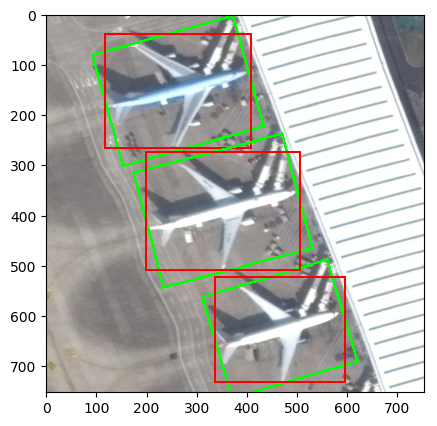

(<matplotlib.image.AxesImage at 0x1be457f7a58>, None)

In [14]:
im = Image.open('demo.tif')

# 465.837522204 627.858738166 256.753745594 207.864144608 1 16.5859465751 1.0
# 262.597336833 152.69555652 287.811689191 225.521194166 1 15.5876267039 1.0
# 352.980308508 391.275265862 302.487150641 232.075637204 1 14.6078637892 1.0


cx, cy, w, h = 465.837525364, 627.858731845, 256.753741002, 207.864159476
w, h = int(w), int(h)
angle = 16.5859465751

draw_rectangles(w, h, cx, cy, angle)

cx, cy, w, h = 262.597336833, 152.69555652, 287.811689191, 225.521194166
w, h = int(w), int(h)
angle = 15.5876267039

draw_rectangles(w, h, cx, cy, angle)


cx, cy, w, h = 352.980308508, 391.275265862, 302.487150641, 232.075637204 
w, h = int(w), int(h)
angle = 14.6078637892

draw_rectangles(w, h, cx, cy, angle)


plt.figure(figsize=(5,5),dpi=100) 
plt.imshow(im), plt.show()

(<matplotlib.figure.Figure at 0x1be45284fd0>,
 <matplotlib.image.AxesImage at 0x1be45300668>)

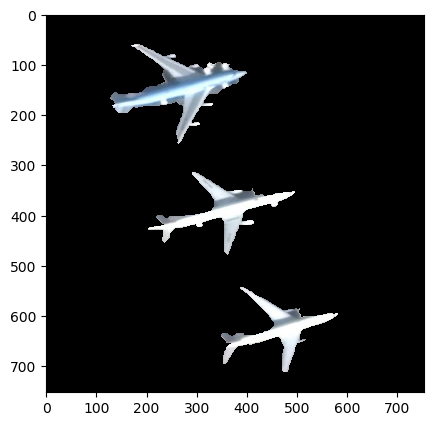

In [5]:
im = Image.open('demo.jpg.png')

plt.figure(figsize=(5,5),dpi=100) , plt.imshow(im)

348 543 582 713


(<matplotlib.figure.Figure at 0x1be457db6a0>,
 <matplotlib.image.AxesImage at 0x1be48097d68>)

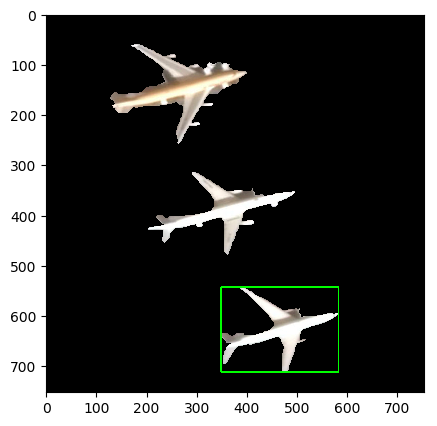

In [15]:
img = cv2.imread('demo.jpg.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,0)
_, contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

x,y,w,h = cv2.boundingRect(cnt)

print(x,y,x+w,y+h)
img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(5,5),dpi=100), plt.imshow(img)

337 524 593 731